# Creating New Planes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi=False

In [3]:
data_path = '../../data/'

In [4]:
case = '0000' # patient

mri_coronal = np.load('{}/train/coronal/0000.npy'.format(data_path))
mri_axial = np.load('{}/train/axial/0000.npy'.format(data_path))
mri_sagittal = np.load('{}/train/sagittal/0000.npy'.format(data_path))

print(f'MRI scan on coronal plane: {mri_coronal.shape}')
print(f'MRI scan on axial plane: {mri_axial.shape}')
print(f'MRI scan on sagittal plane: {mri_sagittal.shape}')

MRI scan on coronal plane: (36, 256, 256)
MRI scan on axial plane: (44, 256, 256)
MRI scan on sagittal plane: (36, 256, 256)


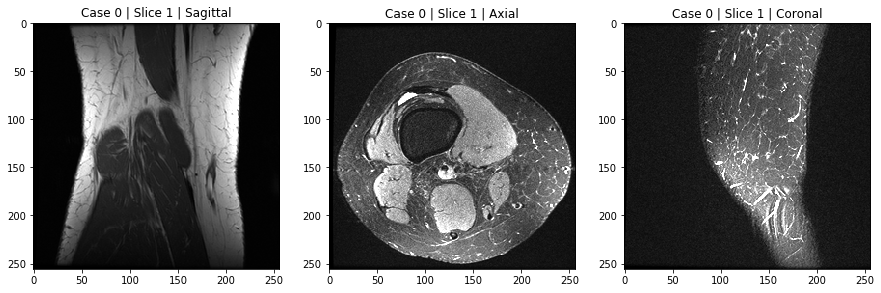

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(mri_coronal[0, :, :], 'gray')
ax1.set_title('Case 0 | Slice 1 | Sagittal')

ax2.imshow(mri_axial[0, :, :], 'gray')
ax2.set_title('Case 0 | Slice 1 | Axial')

ax3.imshow(mri_sagittal[0, :, :], 'gray')
ax3.set_title('Case 0 | Slice 1 | Coronal')

plt.show()

In [6]:
mri_coronal.shape

(36, 256, 256)

In [7]:
len(mri_coronal)

36

In [8]:
mri_coronal[0]

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 1, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

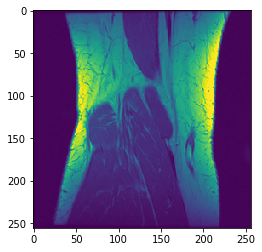

In [9]:
plt.imshow(mri_coronal[0])

In [10]:
array_rotated = {}
for i in range(len(mri_coronal)):
    array = mri_coronal[i]
    for j in range(len(array)):
        array_rotated.setdefault(j, [])
        array_rotated[j].append(
            array[j]
        )

In [11]:
len(array_rotated[0])

36

In [12]:
first = np.stack(array_rotated[0], axis=1)

In [13]:
first.shape

(256, 36)

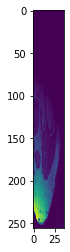

In [14]:
plt.imshow(first)

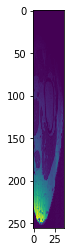

In [15]:
plt.imshow(np.stack(array_rotated[1], axis=1))

In [16]:
def plot_slices(images, image_name, figsize=(12, 75)):
    
    num_slices = len(images)
    print('Number of slices: {}'.format(num_slices))

    cols = 10
    rows = num_slices // cols
    if num_slices % cols > 0: rows += 1

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize, dpi=100)
    axes_flattened = axes.flatten()

    for i in range(rows * cols):
        if i < num_slices:
            slice_array = np.stack(images[1], axis=1)
            axes_flattened[i].imshow(slice_array, cmap='gray')
            # axes_flattened[i].set_title('Slice {}'.format(i))
        axes_flattened[i].axis('off')

    fig.tight_layout()
    
    plt.savefig('../../figures/{}'.format(image_name), bbox_inches='tight')
    
    plt.show()

Number of slices: 256


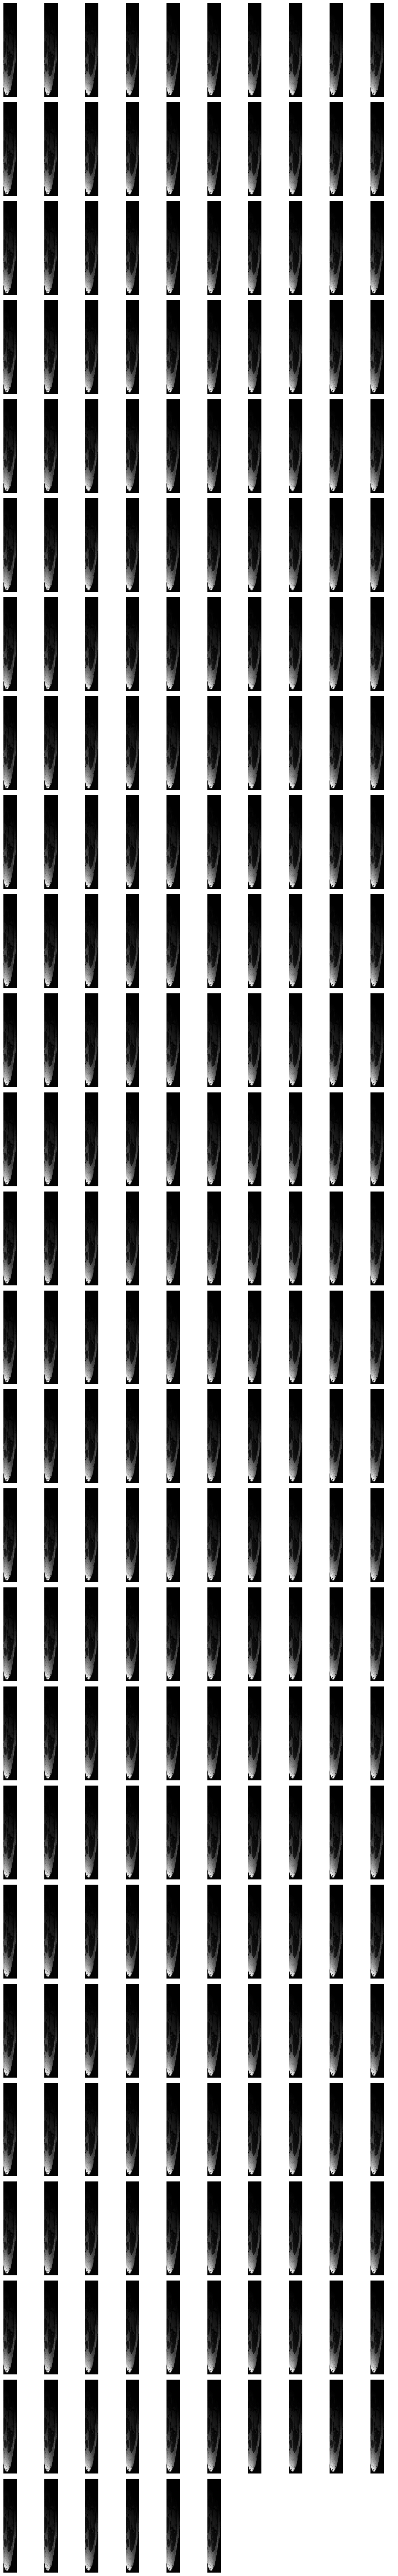

In [17]:
plot_slices(array_rotated, 'new_planes_horizontal_slicing_coronal_256_slices.png')